In [1]:
import requests
import pandas as pd
import numpy as np
from numpy import random
import itertools
import matplotlib.pyplot as plt
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set_style('darkgrid')
from wordcloud import WordCloud
from ipywidgets import interact, interact_manual, widgets

import os

### Loading Dataset

Loading all dataset for the project and appending to a list

In [2]:
path = "./edsa-movie-recommendation-2022"
dir_list = os.listdir(path)
listing = []
df_list = []
for x in dir_list:
    if x.endswith('.csv'):
        listing .append(x)
count = 0
for x in listing:
    print(f"index {count}: Overview of {x} DataFrame")
    temp_df = pd.read_csv(f'{path}/{x}')
    df_list.append(temp_df)
    display(temp_df.head())
    print(temp_df.shape)
    count += 1

index 0: Overview of genome_scores.csv DataFrame


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


(15584448, 3)
index 1: Overview of genome_tags.csv DataFrame


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


(1128, 2)
index 2: Overview of imdb_data.csv DataFrame


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


(27278, 6)
index 3: Overview of links.csv DataFrame


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


(62423, 3)
index 4: Overview of movies.csv DataFrame


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(62423, 3)
index 5: Overview of sample_submission.csv DataFrame


,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


(5000019, 2)
index 6: Overview of tags.csv DataFrame


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


(1093360, 4)
index 7: Overview of test.csv DataFrame


,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


(5000019, 2)
index 8: Overview of train.csv DataFrame


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


(10000038, 4)


### Exploring `movies` dataset 

In [3]:
df_movies = df_list[4].copy()
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


The `movies` dataset has `62423` rows/movies and `3` features describing this movies and it has no null value since all value taly in the `Non-null count` column

Extracting each movies year to forma new column on when each movies was made

In [5]:
df_movies["year_made"] = df_movies["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)) 
                                                  if re.findall(r"\((\d+)\)+$", x) else 0)

df_movies.head()

,movieId,title,genres,year_made
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [6]:
# confirm if all movies have a year in it title and that we don't have a null value in our new column
df_movies.isna().sum()

movieId      0
title        0
genres       0
year_made    0
dtype: int64

In [7]:
# making each genres into a list to be able to split
df_movies['genres'] = df_movies['genres'].fillna('').apply(lambda x: x.split("|"))

# Splitting each genre to each movies
genre = df_movies.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'genre'
df_mov_gen = df_movies.drop('genres', axis=1).join(genre)
df_mov_gen.head()

,movieId,title,year_made,genre
0,1,Toy Story (1995),1995,Adventure
0,1,Toy Story (1995),1995,Animation
0,1,Toy Story (1995),1995,Children
0,1,Toy Story (1995),1995,Comedy
0,1,Toy Story (1995),1995,Fantasy


In [8]:
# Converting 'year_made' into numeric datatype
df_mov_gen["year_made"] = df_mov_gen["year_made"].astype('int64')

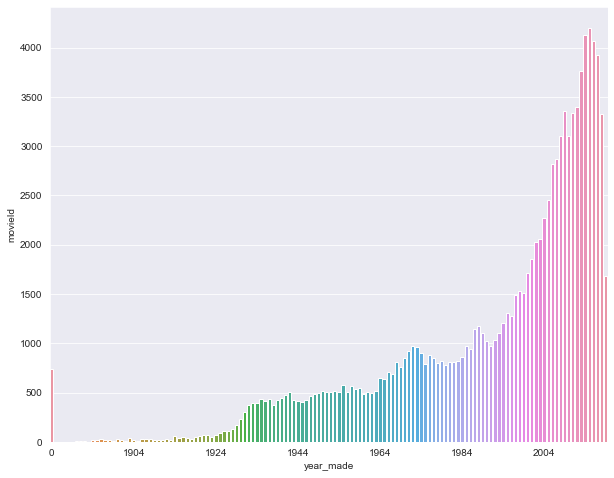

In [9]:
# visualizing how the year of the movies are distributed
df_mov_year = df_mov_gen.groupby("year_made").agg({"movieId":"count"}).reset_index()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=df_mov_year,  x="year_made", y="movieId")
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.show()

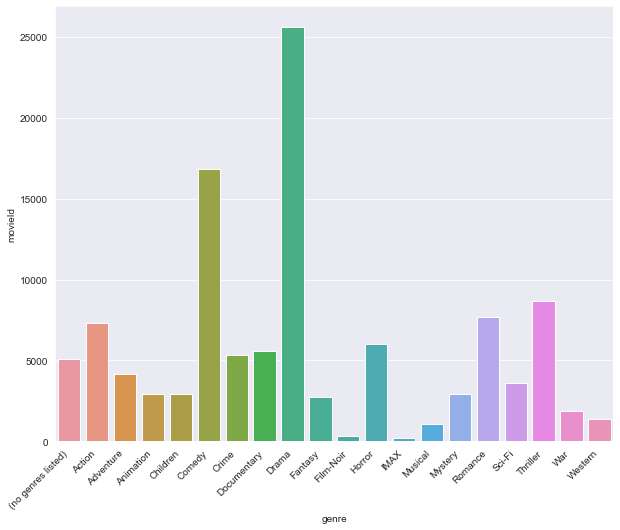

In [10]:
# visualizing how the genres of the movies are distributed
df_grp_gens = df_mov_gen.groupby("genre").agg({"movieId":"count"}).reset_index()
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=df_grp_gens,  x="genre", y="movieId")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

#### Creating a `word-cloud` for title of movies base on the `genres`

In [11]:
def bag_of_words_count(words, splitter: str=' ',  word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    words = words.split(splitter)
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [12]:
def word_extract(df=df_mov_gen, coln: str='title', splitter=' '):
    """This use to compile all the word and there frequency 
    in the individual category found in a particular column"""
#     count = 0
    result = {}
    type_labels = df.genre.unique()
    genres_dict = {}
    df_grp = df.groupby('genre')
    for pp in type_labels:
        genres_dict[pp] = {}
        for row in df_grp.get_group(pp)[coln]:
            genres_dict[pp] = bag_of_words_count(words=row, splitter=splitter, word_dict=genres_dict[pp])
    return genres_dict

In [13]:
# Interactive plotting
def iplotting():
    d = word_extract()
    @interact_manual
    def selecting(genre_name = d.keys()):
        word_cloud_genre=WordCloud(width=1500, height=800, background_color='black', min_font_size=2,
                        min_word_length=3).generate(str(d[genre_name]))
        plt.figure(figsize=(20,10))
        plt.axis('off')
        plt.title(f'Word Cloud for {genre_name} Genre Movie titles',fontsize=30)
        plt.imshow(word_cloud_genre);
iplotting()

interactive(children=(Dropdown(description='genre_name', options=('Adventure', 'Animation', 'Children', 'Comed…

### Exploring `train` dataset

Exploring the train dataset to gain insight into the rating of `movies` and there various tags using the `genome scores and tags`

In [14]:
df_genome_scores = df_list[0].copy() # loading & assigning a varaible to the 'genome_scores' dataset
df_genome_tags = df_list[1].copy() # loading & assigning a varaible to the 'genome_tags' dataset
df_train = df_list[8].copy() # loading & assigning a varaible to the 'train' dataset


Merging the three dataframe plus `movies` dataset above to make one fine and informed dataframe

In [15]:
# Combining dataframe 'df_genome_scores' and 'df_genome_tags'
genome_comb = df_genome_scores.merge(df_genome_tags, how="left", on=["tagId"])
display(genome_comb.shape)
genome_comb.head(10)

(15584448, 4)

,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,1,2,0.02375,007 (series)
2,1,3,0.06250,18th century
3,1,4,0.07575,1920s
4,1,5,0.14075,1930s
5,1,6,0.14675,1950s
6,1,7,0.06350,1960s
7,1,8,0.20375,1970s
8,1,9,0.20200,1980s
9,1,10,0.03075,19th century


In [16]:
# grouping by 'movieId' and by calculating maximum 'relevance' corresponding to know the actual 'tag' of a 'movie'
genome_grp = genome_comb.groupby('movieId')[["relevance"]].max().reset_index()
display(genome_grp.shape)
genome_grp.head()

(13816, 2)

,movieId,relevance
0,1,0.99925
1,2,0.97600
2,3,0.97525
3,4,0.97525
4,5,0.96025


In [17]:
# Combinig the the grouped dataframe with the original dataframe to match each 'tag' to it respecitive 'relevance'
genome_comb1 = genome_grp.merge(genome_comb[['movieId', 'relevance', 'tag']], on=["movieId", "relevance"])

# drop duplicates to have a sync. merge of movie and `tag` and unccessary 'relevance' column
genome_comb1 = genome_comb1.drop_duplicates(subset=['movieId'])
genome_comb1 = genome_comb1.drop('relevance', axis=1)

genome_comb1.head()

,movieId,tag
0,1,toys
1,2,adventure
2,3,sequel
3,4,women
4,5,sequel


In [18]:
# merging ealier dataframe 'df_comb2' with tag and movie dataframe 'df_gem_comb1'
train_tags = df_train.merge(genome_comb1, how='left', on=["movieId"])
display(train_tags.shape)
train_tags.head(10)

(10000038, 5)

,userId,movieId,rating,timestamp,tag
0,5163,57669,4.0,1518349992,hit men
1,106343,5,4.5,1206238739,sequel
2,146790,5459,5.0,1076215539,alien
3,106362,32296,2.0,1423042565,sequels
4,9041,366,3.0,833375837,horror
5,120949,81768,3.0,1289595242,NaN
6,19630,62049,4.0,1246729817,george orwell
7,21066,2282,1.0,945785907,weird
8,117563,120474,4.0,1515108225,toys
9,144018,1997,5.0,1109967647,horror


In [19]:
#combining dataframe in index 8 and index 4 from the df_list
train_comb = train_tags.merge(df_movies, how="inner", on=["movieId"])
display(train_comb.shape)
train_comb.head(10)

(10000038, 8)

,userId,movieId,rating,timestamp,tag,title,genres,year_made
0,5163,57669,4.0,1518349992,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
1,87388,57669,3.5,1237455297,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
2,137050,57669,4.0,1425631854,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
3,120490,57669,4.5,1408228517,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
4,50616,57669,4.5,1446941640,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
5,99887,57669,0.5,1448839196,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
6,120194,57669,4.5,1479382352,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
7,847,57669,3.5,1232893563,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
8,47201,57669,4.5,1464351173,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008
9,94499,57669,4.5,1316689295,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008


In [20]:
# Checking for null value after merging
train_comb.isnull().sum()

userId            0
movieId           0
rating            0
timestamp         0
tag          130490
title             0
genres            0
year_made         0
dtype: int64

The tag features have a few null value in comparism with the large dataset, we will go ahead to replace those null values with keyword `unknown`

In [21]:
# making each genres into a list to be able to split
train_comb['tag'] = train_comb['tag'].fillna('unknown')

#### Converting the timestampe into `datetime` datatype and aslo into new features

In [22]:
train_comb['Rating_Datetime'] = pd.to_datetime(train_comb['timestamp'], unit='s')
train_comb.drop('timestamp', axis=1, inplace=True)

In [23]:
train_comb.head()

,userId,movieId,rating,tag,title,genres,year_made,Rating_Datetime
0,5163,57669,4.0,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008,2018-02-11 11:53:12
1,87388,57669,3.5,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008,2009-03-19 09:34:57
2,137050,57669,4.0,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008,2015-03-06 08:50:54
3,120490,57669,4.5,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008,2014-08-16 22:35:17
4,50616,57669,4.5,hit men,In Bruges (2008),"[Comedy, Crime, Drama, Thriller]",2008,2015-11-08 00:14:00


In [24]:
train_comb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 8 columns):
 #   Column           Dtype         
---  ------           -----         
 0   userId           int64         
 1   movieId          int64         
 2   rating           float64       
 3   tag              object        
 4   title            object        
 5   genres           object        
 6   year_made        object        
 7   Rating_Datetime  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 686.6+ MB


In [25]:
# Converting 'year_made' into numeric datatype
train_comb["year_made"] = train_comb["year_made"].astype('int64')

In [26]:
# Let's have a look at the unique number of users
train_comb[["userId"]].nunique() 

userId    162541
dtype: int64

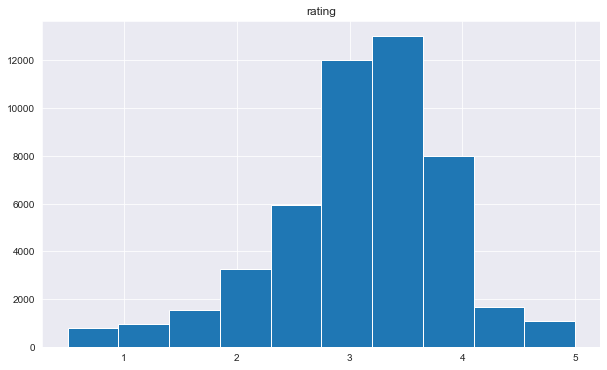

In [27]:
# distribution of mean rating
rating_grp = train_comb.groupby("movieId")[["rating"]].mean()
rating_grp.hist(figsize=(10, 6));

Bulk of the rating are between the value of `3-4` which bascially informed us while the dristibution is `left skewed`

In [28]:
# Group all 2 star and lower ratings together
ratings = train_comb.copy()
ratings[ratings.rating == 0.5] = 2
ratings[ratings.rating == 1] = 2
ratings[ratings.rating == 1.5] = 2

In [29]:
def viza(title: str):
    # Extract selected movie ratings
    top = ratings[ratings['title'] == title]

    # Count how many ratings are in each category: 1 star, 2 star, ect
    grouped = pd.DataFrame(top.groupby(['rating'])['title'].count())
    grouped.rename(columns={'title': 'rating_count'}, inplace=True)

    # Create the figure
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(122)

    # Create the colour palette
    temp = grouped['rating_count']
    temp_mod = [f'{round((x / sum(temp)) * 100)}%' for x in temp]
    labels = [f'{x} Stars - {y}' for x, y in zip(grouped.index, temp_mod)]
    theme = plt.get_cmap('Reds')
    ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                for i in range(len(labels))])

    # Create the pie chart
    pie = ax.pie(grouped['rating_count'],
                 labels=labels,
                 shadow=True,
                 startangle=10,
                 pctdistance=1.115,
                 explode=(random.choice([0.1], size=(len(grouped['rating_count']))))
                 )

    # Turn the pie chart into a donut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Display the donut chart with a legend
    ax.set_title(f'Rating distribution for the {title}\n', fontsize=15)
    plt.tight_layout()
    plt.show()

In [30]:
# Interactive visual how movie fair via user ratings
def iplotting_rating():
    genres_df = df_mov_gen.groupby('genre')[['title']]
    genres = df_mov_gen.genre.unique()
#     titles=genres_df.get_group(gen)
    @interact
    def selecting(genres=genres):
        titles = genres_df.get_group(genres)['title'].to_list()
        @interact_manual
        def selecting1(titles=titles):
            viza(titles)
iplotting_rating()


interactive(children=(Dropdown(description='genres', options=('Adventure', 'Animation', 'Children', 'Comedy', …

#### Exploring `imdb_data` DataFrame

In [31]:
# combining dataframe in index 2 from the df_list and current train merged 'train_comb' to give
# an enrich dataset for exploration of 'imdb data'
df_imdb = df_list[2].merge(train_comb, how="inner", on=["movieId"])
display(df_imdb.shape)
df_imdb.head()

(9633031, 13)

,movieId,title_cast,director,runtime,budget,plot_keywords,userId,rating,tag,title,genres,year_made,Rating_Datetime
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,toys,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,2001-07-09 22:13:06
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,toys,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1999-11-15 16:25:55
2,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,161871,3.0,toys,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1996-05-26 09:56:16
3,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,45117,4.0,toys,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,2015-09-14 18:56:09
4,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,27431,5.0,toys,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1996-12-04 02:50:27


In [32]:
# Checking for null values
df_imdb.isnull().sum()

movieId                  0
title_cast         2604407
director           2602688
runtime            2653058
budget             3152276
plot_keywords      2610043
userId                   0
rating                   0
tag                      0
title                    0
genres                   0
year_made                0
Rating_Datetime          0
dtype: int64

In [33]:
# Dropping null values to have a better unbiased analysis of the dataset
df_imdb = df_imdb.dropna(subset=['budget', 'runtime', 'plot_keywords', 'title_cast'])

# Checking for null values again
df_imdb.isnull().sum()

movieId            0
title_cast         0
director           0
runtime            0
budget             0
plot_keywords      0
userId             0
rating             0
tag                0
title              0
genres             0
year_made          0
Rating_Datetime    0
dtype: int64

In [34]:
print(f'We have {df_imdb.userId.nunique()} numbers of users in the new and modified "imdb" dataset and\
      \nWe also have {df_imdb.movieId.nunique()} number of movies to explore YAY!!!')

print(f'The dataset has {df_imdb.shape[0]} rows/entries and {df_imdb.shape[1]} features/columns') 

We have 162182 numbers of users in the new and modified "imdb" dataset and      
We also have 6418 number of movies to explore YAY!!!
The dataset has 6454993 rows/entries and 13 features/columns


#### Engineer new features for the `IMDB` dataset

In [35]:
df_imdb['rated_year'] = pd.DatetimeIndex(df_imdb['Rating_Datetime']).year
df_imdb['rated_month'] = pd.DatetimeIndex(df_imdb['Rating_Datetime']).month
df_imdb['rated_day'] = pd.DatetimeIndex(df_imdb['Rating_Datetime']).day
df_imdb.drop('Rating_Datetime', axis=1, inplace=True)

In [36]:
df_imdb.sample(5)

,movieId,title_cast,director,runtime,budget,plot_keywords,userId,rating,tag,title,genres,year_made,rated_year,rated_month,rated_day
645890,247,Melanie Lynskey|Kate Winslet|Sarah Peirse|Dian...,Fran Walsh,99.0,"$5,000,000",fantasy life|orgy|sex with a minor|teenage crush,66926,4.0,obsession,Heavenly Creatures (1994),"[Crime, Drama]",1994,2004,8,4
5782794,3897,Billy Crudup|Frances McDormand|Kate Hudson|Jas...,Cameron Crowe,122.0,"$60,000,000",on the road|rock 'n' roll|1970s|tour bus,24143,3.0,rock and roll,Almost Famous (2000),[Drama],2000,2005,3,28
522096,185,Sandra Bullock|Jeremy Northam|Dennis Miller|Di...,John Brancato,114.0,"$22,000,000",computer|identity|identity theft|computer hacker,67635,3.0,internet,"Net, The (1995)","[Action, Crime, Thriller]",1995,1996,6,7
8734068,69757,Joseph Gordon-Levitt|Zooey Deschanel|Geoffrey ...,Scott Neustadter,95.0,"$7,500,000",true love|bangs|hiked skirt|premarital sex,157425,5.0,relationships,(500) Days of Summer (2009),"[Comedy, Drama, Romance]",2009,2010,3,23
8386997,55830,Jack Black|Yasiin Bey|Danny Glover|Mia Farrow|...,Michel Gondry,102.0,"$20,000,000",video store|movie premiere|videotape|scene dur...,136860,3.0,original,Be Kind Rewind (2008),[Comedy],2008,2011,10,19


#### Important  words for `Plot` and `Cast`

In [37]:
def imdb_extract(coln: str, splitter='|', df=df_imdb):
    """This use to compile all the keyword and there frequency 
    in the imdb dataset found in a particular column"""
    keywords_dict = {}
    movieId = df.movieId.unique()
    df_grp = df_imdb.groupby('movieId')
    for pp in movieId:
        row = df_grp.get_group(pp)[coln].values[0]
        keywords_dict = bag_of_words_count(words=row, splitter=splitter, word_dict=keywords_dict)
        
#     Sorting the dictionary
    sorted_dt = {key: value for key, value in sorted(keywords_dict.items(), key=lambda item: item[1], reverse=True)}
    return sorted_dt

In [38]:
# making a dictionary for the keyword and there frequency
keyword_dict = imdb_extract(coln='plot_keywords')

# making a dictionary for the cast (actors and actress) and there frequency
casts_dict = imdb_extract(coln='title_cast')

In [39]:
def iplotting():   
    slider = widgets.IntSlider(value=25, min=10, max=50, step=1)
    @interact_manual
    def selecting(WordType=['Plot Keywords', 'Title Cast'], Frequency=slider, ):
        if WordType == 'Title Cast':
            num_dict_items = dict(itertools.islice(casts_dict.items(), Frequency))
        else:
            num_dict_items = dict(itertools.islice(keyword_dict.items(), Frequency))
        word_cloud_genre=WordCloud(width=1500, height=800, background_color='white',
                                   relative_scaling=0.2, min_font_size=2,).generate_from_frequencies(num_dict_items)
        plt.figure(figsize=(20,10))
        plt.axis('off')
        plt.title(f'{WordType} for Movies',fontsize=30)
        plt.imshow(word_cloud_genre);
iplotting()

interactive(children=(Dropdown(description='WordType', options=('Plot Keywords', 'Title Cast'), value='Plot Ke…

#### Movie Runtime Distribution

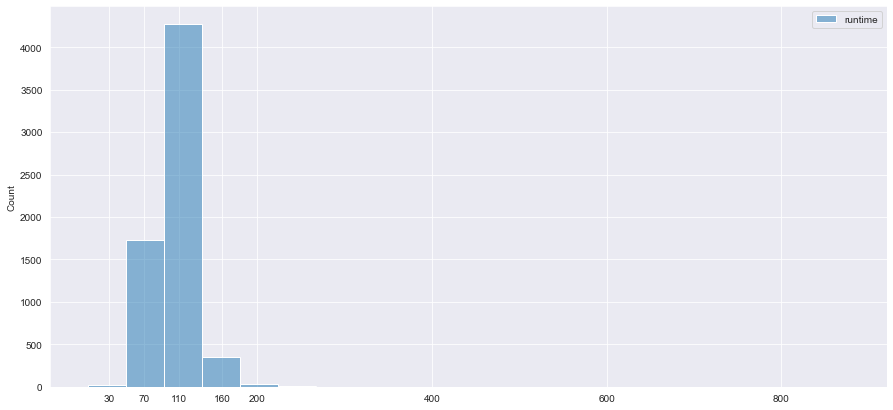

In [40]:
runtime_df = df_imdb.groupby('movieId')[['runtime']].mean()
plt.figure(figsize=(15, 7))
sns.histplot(runtime_df, bins=20)
plt.xticks([30, 70, 110, 160, 200, 400, 600, 800])
plt.show()

The `runtime` shows that bulk of movies are between `70-110 minutes` durations<br>
while from `300 minutes` movies and `upwards` are rare and can be considered outliers

#### Budget VS Rating
Visual for budget and how it affect rating by `users`

In [41]:
# Converting budget into numeric datatype
df_imdb['budget_currency'] = df_imdb.budget.apply(lambda x: re.match('[^0-9]+', x).group(0))
df_imdb['budgets'] = df_imdb.budget.apply(lambda x: x.replace(re.match('[^0-9]+', x).group(0), ''))
df_imdb['budgets'] = df_imdb.budgets.apply(lambda x: x.replace(',', '')).astype('float64')


In [42]:
# Lisiting all currency in our dataset
currency = df_imdb.budget_currency.unique()
currency

array(['$', 'GBP', 'EUR', 'CAD', 'FRF', 'DEM', 'AUD', 'JPY', 'HKD', 'CHF',
       'ESP', 'INR', 'BEF', 'SEK', 'ATS', 'NOK', 'FIM', 'SGD', 'DKK',
       'THB', 'BRL', 'NLG', 'BND', 'CNY', 'NZD', 'HUF', 'KRW', 'CZK',
       'PLN', 'ISK', 'BGL', 'IDR', 'MYR', 'CLP', 'MXN', 'ARS', 'ILS',
       'PTE', 'VEB', 'TWD', 'NGN', 'ITL', 'LVL', 'RUR', 'PHP'],
      dtype=object)

In [43]:
# Importing current exchange rate from `exchangerate-api.com`
url = 'https://open.er-api.com/v6/latest/USD'
data = requests.get(url).json()
currencies = data['rates']

In [44]:
# currency not in the json file
for x in currency:
    if x not in currencies:
        print(x, end=",")

$,FRF,DEM,ESP,BEF,ATS,FIM,NLG,BGL,PTE,VEB,ITL,LVL,RUR,

In [45]:
# inputing manually for currency not so popular and not in the json file
other_curr = {'$':1, 'FRF':0.155, 'DEM':0.52, 'ESP':1.02, 'BEF':0.025, 'ATS':0.074, 
              'FIM':0.17, 'NLG':0.46, 'BGL':0.52, 'PTE':0.00508, 'VEB':0.0000000018,
              'ITL':0.000526, 'LVL':1.449,'RUR':0.016,}

In [46]:
# appending exchange rate against dollar to a dictionary
currency_exchange = {}
for x in currency:
    currency_exchange[x] = (currencies | other_curr)[x]
# currency_exchange

In [47]:
# Grouping to movies and converting all currency to 'USD'
movie_grp = df_imdb.groupby('movieId').agg({"rating":"mean",
                                            "budget_currency":lambda x: pd.Series.mode(x)[0], "budgets":"mean"})
movie_grp['conv_budget'] = movie_grp.apply(lambda x: round(x.budgets/currency_exchange[x.budget_currency]), axis=1)
movie_grp.sample(10)

,rating,budget_currency,budgets,conv_budget
movieId,,,,
1379,3.002683,$,20000000.0,20000000
7951,3.343284,$,11000000.0,11000000
94746,3.073529,EUR,24000000.0,24415056
5265,3.172862,$,50000000.0,50000000
632,3.947853,GBP,2500000.0,3001200
95307,2.978417,$,75000000.0,75000000
80398,3.268293,EUR,18000000.0,18311292
94469,3.724490,AUD,8500000.0,5821918
75808,3.166667,$,5000000.0,5000000


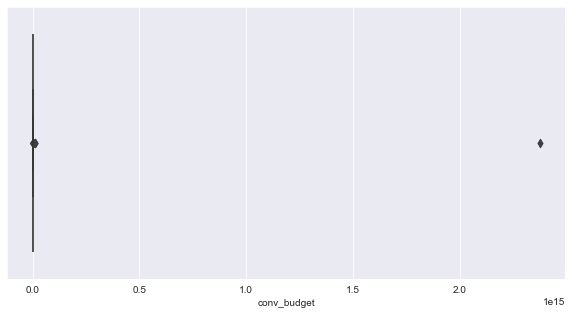

In [48]:
# Using visual to check for outliers
fig, ax = plt.subplots(1, figsize=(10,5))
sns.boxenplot(x='conv_budget', data=movie_grp);


This visual show us there is extreme outlier(s) in the dataset and will have bad influence on the intepretation of following visuals, therefore we need to remove those `outliers`

In [49]:
# Dealing with outliers, since we have an outrageous one in our dataset
Q1 = np.percentile(movie_grp['conv_budget'], 25.0)
Q3 = np.percentile(movie_grp['conv_budget'], 75.0)
IQR = Q3 - Q1
df_sub = movie_grp[movie_grp['conv_budget'] > Q3 + 1.5*IQR]
movie_grp_mod = movie_grp.drop(df_sub.index)

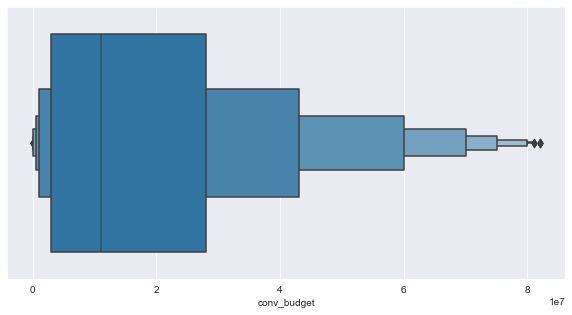

In [50]:
# Using visual to check again for outliers
fig, ax = plt.subplots(1, figsize=(10,5))
sns.boxenplot(x='conv_budget', data=movie_grp_mod);

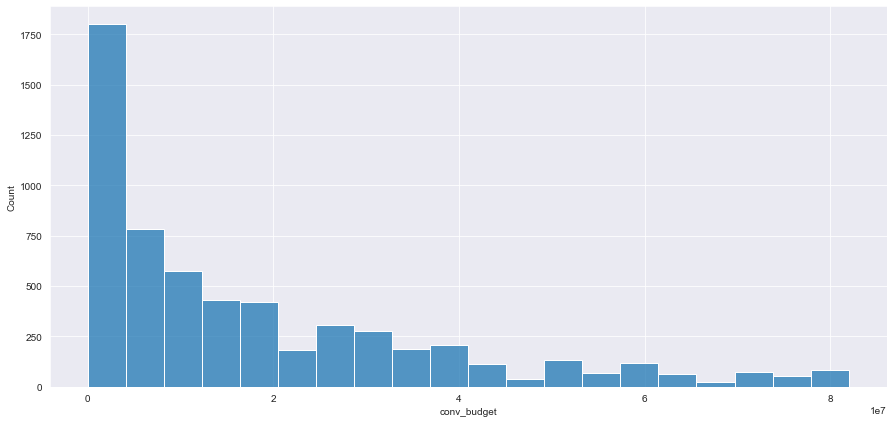

In [51]:
# Visualize the distribution of the movies budgets
plt.figure(figsize=(15, 7))
sns.histplot(x=movie_grp_mod['conv_budget'], bins=20)
plt.show()

The histogram show that our budget is skewed to the right, and dipect, we have lesser film has cost of movie `budget` increases

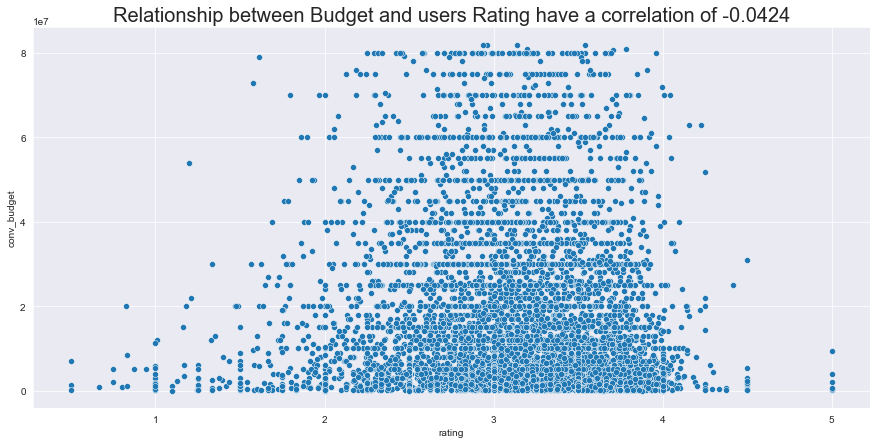

In [78]:
# Plotting a scatter plot to visualize relationship between 
plt.figure(figsize=(15, 7))
sns.scatterplot(data=movie_grp_mod, y='conv_budget', x='rating');
plt.title(f'Relationship between Budget and users Rating have a\
 correlation of {round(movie_grp_mod.conv_budget.corr(movie_grp_mod.rating),4)}', fontsize=20)
plt.show()

Though there might be some correlation between `budgets and rating` it is very `weak` and it is safe to assume that money used in making film does not really have much impart into what inform users ratings

#### Simple Recommender System
- Using the year movie was made, ratings and each movies number of rating or voting to filter and rank movies to see what people are watching or get list of trendy films<br><br>
Since we want to include the whole users input from the dataset we will go back to our earlier `train combined dataset (train_comb)` and use that to create new features, which we will then use in ranking `movies`

In [53]:
# Creating new features 'rating_average' and 'rating_count' per each movies in our dataset
movie_ranking_df = pd.DataFrame(train_comb.groupby(['title'])[['rating']].agg(
    rating_average=('rating',np.mean), 
    rating_count=('rating','count')))

# Using the product of the new features to create another feature call 'popularity'
movie_ranking_df['popularity'] = movie_ranking_df['rating_average'] * movie_ranking_df['rating_count']

# extracting the year in which the movie was made to create new features
movie_ranking_df.reset_index(inplace=True)
movie_ranking_df["year_made"] = movie_ranking_df["title"].apply(lambda x: "".join(re.findall(r"\((\d+)\)+$", x)) 
                                                  if re.findall(r"\((\d+)\)+$", x) else 0)

movie_ranking_df.sort_values('rating_count', ascending=False).head()

,title,rating_average,rating_count,popularity,year_made
34480,"Shawshank Redemption, The (1994)",4.417624,32831,145035.0,1994
14537,Forrest Gump (1994),4.047216,32383,131061.0,1994
31236,Pulp Fiction (1994),4.195097,31697,132972.0,1994
34840,"Silence of the Lambs, The (1991)",4.144172,29444,122021.0,1991
25144,"Matrix, The (1999)",4.154253,29014,120531.5,1999


We will use the TMDB Ratings to come up with our **Top Movies Chart.** using the IMDB's *weighted rating* formula to construct the ranks. Mathematically, it is represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

The next step is to determine an appropriate value for *m*, the minimum votes required to be listed in the chart. We will use **95th percentile** as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified['wr'] = qualified.apply(weighted_rating, axis=1)

qualified = qualified.sort_values('wr', ascending=False).head(250)

### Top Movies

qualified.head(15)

We see that three Christopher Nolan Films, **Inception**, **The Dark Knight** and **Interstellar** occur at the very top of our chart. The chart also indicates a strong bias of TMDB Users towards particular genres and directors. 

Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the **85th** percentile instead of 95. 

In [54]:
# Attempt to create the formular above
vote_counts = movie_ranking_df[movie_ranking_df['rating_count'].notnull()]['rating_count'].astype('int')
vote_averages = movie_ranking_df[movie_ranking_df['rating_average'].notnull()]['rating_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.95)
print(f'The mean rating for the whole dataset is {round(C, 2)} and minimum votes required to be listed is {round(m)}')

The mean rating for the whole dataset is 2.7 and minimum votes required to be listed is 816


In [55]:
movie_ranking_df.head()

,title,rating_average,rating_count,popularity,year_made
0,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",3.000000,1,3.0,1983
1,"""Great Performances"" Cats (1998)",2.753731,67,184.5,1998
2,#1 Cheerleader Camp (2010),1.900000,5,9.5,2010
3,#Female Pleasure (2018),4.000000,1,4.0,2018
4,#FollowMe (2019),2.400000,5,12.0,2019


In [56]:
# creating a function to calculate the weighting rating as recommended by IMDB
def weighted_rating(x, mini=m, avg_votes=C):
    votes = x['rating_count']
    avg_rating = x['rating_average']
    return (votes/(votes+mini) * avg_rating) + (mini/(mini+votes) * avg_votes)

In [57]:
# Creating th feature 'weighted_rating'
movie_ranking_df['weighted_rating'] = movie_ranking_df.apply(weighted_rating, axis=1)

movie_ranking_df.sort_values('weighted_rating', ascending=False).head()


,title,rating_average,rating_count,popularity,year_made,weighted_rating
34480,"Shawshank Redemption, The (1994)",4.417624,32831,145035.0,1994,4.375983
15944,"Godfather, The (1972)",4.311355,20960,90366.0,1972,4.251000
45118,"Usual Suspects, The (1995)",4.278073,22032,94254.5,1995,4.221739
33688,Schindler's List (1993),4.247625,24004,101960.0,1993,4.196769
15945,"Godfather: Part II, The (1974)",4.274085,13525,57807.0,1974,4.184562


In [58]:
# Creating a dataframe for movies that meet requirement to be in the trend or ranked list
qualify_df = movie_ranking_df[(movie_ranking_df['rating_count'] >= m)][['title', 'year_made', 'rating_count',
                                                                        'rating_average', 'popularity', 'weighted_rating']]
qualify_df['rating_count'] = qualify_df['rating_count'].astype('int')
qualify_df['rating_average'] = qualify_df['rating_average'].astype('int')
qualify_df.shape

(2408, 6)

Therefore, to qualify to be considered for the ranked movies, a movie has to have at least **816 ratings** on TMDB. We also see that the average rating for a movie on TMDB is **2.7** on a scale of 5. **2408** Movies qualify to be on our chart.

### Top Movies

In [59]:
qualify_df.sort_values('weighted_rating', ascending=False).head(15)

,title,year_made,rating_count,rating_average,popularity,weighted_rating
34480,"Shawshank Redemption, The (1994)",1994,32831,4,145035.0,4.375983
15944,"Godfather, The (1972)",1972,20960,4,90366.0,4.251000
45118,"Usual Suspects, The (1995)",1995,22032,4,94254.5,4.221739
33688,Schindler's List (1993),1993,24004,4,101960.0,4.196769
15945,"Godfather: Part II, The (1974)",1974,13525,4,57807.0,4.184562
13799,Fight Club (1999),1999,23536,4,99508.0,4.176733
31236,Pulp Fiction (1994),1994,31697,4,132972.0,4.157593
28738,One Flew Over the Cuckoo's Nest (1975),1975,14403,4,60750.5,4.136561
25144,"Matrix, The (1999)",1999,29014,4,120531.5,4.114493
11749,Dr. Strangelove or: How I Learned to Stop Worr...,1964,10673,4,45017.5,4.110135


for easy access and not to be `genre` bias, we will split and match each genre to the appripoate movie, so as to filter by `genre` and see top listed movies

In [60]:
# drop duplicates to have a sync. merge of genres with the dataset
temp_df = df_list[4].drop_duplicates(subset=['title'])

# merging genres with the 'qualify_df'
trend_df = temp_df[['title', 'genres']].merge(qualify_df, how="right", on="title")

# making each genres into a list to be able to split
trend_df['genres'] = trend_df['genres'].fillna('').apply(lambda x: x.split("|"))

# Splitting each genre to each movies
genre = trend_df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre.name = 'genre'
qualify_df = trend_df.drop('genres', axis=1).join(genre)
qualify_df.head()

,title,year_made,rating_count,rating_average,popularity,weighted_rating,genre
0,"'burbs, The (1989)",1989,1310,3,4029.5,2.932234,Comedy
1,(500) Days of Summer (2009),2009,4524,3,16780.0,3.555078,Comedy
1,(500) Days of Summer (2009),2009,4524,3,16780.0,3.555078,Drama
1,(500) Days of Summer (2009),2009,4524,3,16780.0,3.555078,Romance
2,10 Cloverfield Lane (2016),2016,1459,3,5421.0,3.351745,Thriller


In [84]:
# visualizing base on genre and other filtering method
def iplotting():   
    slider = widgets.IntSlider(value=10, min=5, max=50, step=1)
    df_grp = qualify_df.groupby('genre')
    genre_list = qualify_df.genre.unique()
    @interact
    def selecting(filterBy=['Recent', 'Popularity', 'Hot-List'], Genre=genre_list, Frequency=slider, ):
        if filterBy == 'Recent':
            temp = df_grp.get_group(Genre).sort_values(['year_made', 'weighted_rating'], ascending=False)[:Frequency]
        elif filterBy == 'Popularity':
            temp = df_grp.get_group(Genre).sort_values(['popularity', 'year_made'], ascending=False)[:Frequency]
        else:
            temp = df_grp.get_group(Genre).sort_values('weighted_rating', ascending=False)[:Frequency]
        display(temp.drop('genre', axis=1).reset_index(drop=True))
iplotting()

interactive(children=(Dropdown(description='filterBy', options=('Recent', 'Popularity', 'Hot-List'), value='Re…